# Dataset 4 - downsampling of Dataset 3 instead of SMOTE

### To explore on the effects of downsampling the majority class instead of SMOTE

## Data Processing

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv(r'Assignment_1_data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36489 entries, 0 to 36488
Data columns (total 60 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   gender                      36489 non-null  object 
 1   age                         36489 non-null  float64
 2   heart_rate_min              36417 non-null  float64
 3   heart_rate_max              36417 non-null  float64
 4   heart_rate_mean             36417 non-null  float64
 5   mbp_min                     36401 non-null  float64
 6   mbp_max                     36401 non-null  float64
 7   mbp_mean                    36401 non-null  float64
 8   sbp_min                     36343 non-null  float64
 9   sbp_max                     36343 non-null  float64
 10  sbp_mean                    36343 non-null  float64
 11  dbp_min                     36341 non-null  float64
 12  dbp_max                     36341 non-null  float64
 13  dbp_mean                    363

In [4]:
df.head(10)

,gender,age,heart_rate_min,heart_rate_max,heart_rate_mean,mbp_min,mbp_max,mbp_mean,sbp_min,sbp_max,...,bilirubin_indirect_min,urineoutput,sofa_respiration,sofa_coagulation,sofa_liver,sofa_cardiovascular,sofa_cns,sofa_renal,charlson_comorbidity_index,outcome
0,M,54.550390,93.0,115.0,103.500000,57.0,100.0,82.733333,87.0,163.0,...,NaN,3459.0,2.0,0.0,NaN,1.0,0.0,1.0,3,False
1,M,86.324653,50.0,61.0,54.333333,61.0,93.0,71.695652,95.0,141.0,...,NaN,2020.0,NaN,1.0,NaN,1.0,1.0,1.0,8,False
2,M,40.270146,70.0,105.0,83.434783,66.0,92.0,76.695652,94.0,129.0,...,NaN,3050.0,NaN,1.0,0.0,1.0,1.0,0.0,4,False
3,M,73.383547,68.0,98.0,83.880000,74.0,101.0,84.694444,83.0,148.0,...,NaN,1592.0,NaN,0.0,NaN,0.0,0.0,1.0,6,False
4,M,70.724748,77.0,95.0,85.771429,30.0,90.0,62.657143,52.0,129.0,...,NaN,339.0,2.0,0.0,0.0,4.0,1.0,3.0,10,False
5,F,24.131524,82.0,111.0,95.640000,53.0,113.0,77.520000,86.0,136.0,...,NaN,6000.0,NaN,0.0,NaN,1.0,0.0,0.0,1,False
6,M,68.308897,60.0,80.0,71.083333,63.0,112.0,75.720000,87.0,153.0,...,NaN,2560.0,1.0,1.0,NaN,1.0,1.0,0.0,3,False
7,F,57.433933,62.0,92.0,75.240000,65.0,97.0,78.160000,88.0,125.0,...,NaN,2200.0,NaN,2.0,0.0,3.0,0.0,0.0,4,False
8,M,62.564975,48.0,87.0,59.000000,56.0,86.0,71.954545,104.0,140.0,...,NaN,800.0,NaN,1.0,NaN,1.0,0.0,0.0,4,False
9,M,66.238225,61.0,80.0,69.750000,61.0,92.0,74.958333,93.0,127.0,...,NaN,1925.0,NaN,0.0,NaN,1.0,0.0,2.0,7,False


In [5]:
df['outcome'].value_counts(normalize=True)

False    0.963578
True     0.036422
Name: outcome, dtype: float64

In [6]:
df['gender'].replace({'M':1, 'F':0}, inplace=True)

In [7]:
df_norm = df.copy()
for col in df_norm:
    if df_norm[col].dtype == 'float64' or df_norm[col].dtype == 'int64':
        df_norm[col] = (df_norm[col] - df_norm[col].mean())/df_norm[col].std()

In [8]:
df_norm.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
gender,36489.0,3.875086e-17,1.0,-1.094033,-1.094033,0.914024,0.914024,0.914024
age,36489.0,-5.140817e-17,1.0,-2.851891,-0.616634,0.091196,0.763350,2.200235
heart_rate_min,36417.0,-3.476912e-16,1.0,-4.111428,-0.725898,-0.062068,0.601761,6.111546
heart_rate_max,36417.0,7.804517e-18,1.0,-3.244683,-0.730533,-0.101996,0.574891,9.277717
heart_rate_mean,36417.0,-1.841866e-16,1.0,-3.527194,-0.721902,-0.084843,0.650568,5.625750
mbp_min,36401.0,-3.853222e-16,1.0,-4.465290,-0.556648,-0.032199,0.567171,5.437052
mbp_max,36401.0,5.953560e-16,1.0,-2.333690,-0.620407,-0.149254,0.407563,8.288667
mbp_mean,36401.0,-5.176669e-16,1.0,-3.124648,-0.710890,-0.119387,0.606076,6.146404
sbp_min,36343.0,4.467408e-16,1.0,-5.534193,-0.655478,-0.086793,0.571684,5.360607
sbp_max,36343.0,-4.107669e-16,1.0,-4.318088,-0.686553,-0.074005,0.582296,8.939203


In [9]:
#Dataset 4 was created to test out downsampling.

df4 = df_norm.dropna(thresh=len(df_norm)*0.8, axis=1)
df4 = df4.dropna()

df4

,gender,age,heart_rate_min,heart_rate_max,heart_rate_mean,mbp_min,mbp_max,mbp_mean,sbp_min,sbp_max,...,hemoglobin_max,pt_min,pt_max,urineoutput,sofa_coagulation,sofa_cardiovascular,sofa_cns,sofa_renal,charlson_comorbidity_index,outcome
0,0.914024,-0.676099,1.464740,0.574891,1.166921,-0.256963,-0.234918,0.295751,-0.445962,0.669803,...,-1.147582,-0.263124,-0.298959,1.218741,-0.583139,-0.062088,-0.871209,0.144401,-0.928126,False
1,0.914024,1.215508,-1.389727,-2.035957,-1.910332,0.042722,-0.534743,-0.642931,0.032930,-0.292772,...,0.877802,-0.760814,-0.530038,0.082887,0.628932,-0.062088,0.080482,0.144401,0.730365,False
2,0.914024,-1.526240,-0.062068,0.091400,-0.088925,0.417328,-0.577575,-0.217714,-0.026932,-0.817814,...,-1.976148,0.038506,-0.156757,0.895903,0.628932,-0.062088,0.080482,-0.687885,-0.596428,False
4,0.914024,0.286804,0.402612,-0.392090,0.057321,-2.279837,-0.663239,-1.411597,-2.541116,-0.817814,...,0.601614,-0.353613,-0.325622,-1.243986,-0.583139,3.022709,0.080482,1.808973,1.393762,False
6,0.914024,0.142982,-0.725898,-1.117325,-0.861980,0.192564,0.279067,-0.300687,-0.445962,0.232269,...,0.601614,-0.353613,-0.201195,0.509128,0.628932,-0.062088,0.080482,-0.687885,-0.928126,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36483,0.914024,0.433937,-0.062068,-1.455769,-0.892231,-1.380782,0.835884,-0.709179,-0.565685,-0.642800,...,0.509551,0.083751,-0.138981,-0.284154,-0.583139,-0.062088,0.080482,-0.687885,-0.264730,False
36484,-1.094033,1.133833,-0.792281,-1.117325,-1.021259,-4.377632,-0.449079,-0.417524,0.870992,0.188516,...,0.279393,-0.368694,-0.405611,-0.961404,-0.583139,-0.062088,2.935555,0.144401,1.393762,False
36485,-1.094033,-2.102926,-0.792281,0.043051,-0.306747,0.492249,-0.620407,-0.122096,-0.026932,-0.336526,...,0.049236,-0.338531,-0.387835,0.067100,-0.583139,-0.062088,0.080482,-0.687885,-1.923221,False
36486,-1.094033,-0.345968,0.004315,-0.440439,-0.139608,-0.706491,-0.577575,-1.486811,-0.266378,-1.211594,...,-0.825362,0.068670,5.566891,1.251104,-0.583139,-0.062088,-0.871209,-0.687885,-0.928126,False


In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X, y = df4.iloc[:, 0:-1], df4.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123, stratify=y, shuffle=True)
    
data = [X_train, y_train, X_test, y_test]

print(f'For train data:')
print(y_train.value_counts())
print(y_train.value_counts(normalize=True))
print()
print(f'For test data:')
print(y_test.value_counts())
print(y_test.value_counts(normalize=True))
data[0]

For train data:
False    20588
True       843
Name: outcome, dtype: int64
False    0.960664
True     0.039336
Name: outcome, dtype: float64

For test data:
False    8824
True      362
Name: outcome, dtype: int64
False    0.960592
True     0.039408
Name: outcome, dtype: float64


,gender,age,heart_rate_min,heart_rate_max,heart_rate_mean,mbp_min,mbp_max,mbp_mean,sbp_min,sbp_max,...,hemoglobin_min,hemoglobin_max,pt_min,pt_max,urineoutput,sofa_coagulation,sofa_cardiovascular,sofa_cns,sofa_renal,charlson_comorbidity_index
18138,-1.094033,0.569385,0.070698,0.188098,0.025266,0.192564,-0.106422,0.627054,0.332238,2.419941,...,-0.874172,-0.595204,-0.278205,-0.343397,-0.822481,-0.583139,-0.062088,0.080482,-0.687885,-0.264730
18411,-1.094033,-0.212314,0.004315,-0.875580,-0.476645,0.866856,0.150570,0.691881,1.110438,-0.117759,...,-0.523324,-0.871393,-0.157553,-0.254521,-0.078927,-0.583139,-1.090354,1.032173,-0.687885,-0.596428
20721,0.914024,0.973037,0.203464,-0.247043,-0.143954,-0.781412,-0.320582,-0.875450,-0.266378,0.363529,...,-0.347900,-0.595204,6.930760,3.896013,0.197341,0.628932,1.994443,0.080482,0.144401,0.730365
26359,0.914024,1.199198,-0.725898,-1.117325,-0.826273,-0.406806,0.236235,-0.229954,-0.805132,1.501119,...,1.187059,1.614305,-0.308368,-0.272296,0.181554,-0.583139,-0.062088,-0.871209,0.144401,2.720554
34815,0.914024,0.052361,1.199208,0.333146,0.997933,0.492249,-0.706071,-0.237188,0.571684,-0.030252,...,-0.128621,-0.641236,-0.444102,-0.450049,-0.055247,-0.583139,-0.062088,1.983864,-0.687885,-0.596428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7618,0.914024,0.252188,-0.194834,-0.488788,-0.493622,0.042722,1.349869,-0.071125,-0.745270,-0.161512,...,-0.435612,-0.503141,-0.263124,-0.298959,-0.702502,-0.583139,-0.062088,-0.871209,0.144401,1.062063
12072,0.914024,0.513269,0.336229,1.396824,1.519319,0.117643,-0.963064,-0.512677,-1.164301,-2.130417,...,-1.049596,-1.331708,0.279811,0.109873,-1.349757,-0.583139,-0.062088,1.983864,1.808973,2.388856
18910,0.914024,0.242715,1.796654,1.155079,1.383661,-1.305861,-0.277750,-0.164496,-0.565685,0.757310,...,-0.567180,1.107959,-0.097227,-0.121206,-0.067087,0.628932,-0.062088,-0.871209,-0.687885,-0.264730
999,-1.094033,1.375586,1.597506,1.928664,1.739843,-0.781412,-0.320582,-1.357635,-1.583332,-0.642800,...,0.002947,-0.226953,0.370300,0.385390,-0.887996,-0.583139,-0.062088,0.080482,-0.687885,0.730365


In [12]:
data[2]

,gender,age,heart_rate_min,heart_rate_max,heart_rate_mean,mbp_min,mbp_max,mbp_mean,sbp_min,sbp_max,...,hemoglobin_min,hemoglobin_max,pt_min,pt_max,urineoutput,sofa_coagulation,sofa_cardiovascular,sofa_cns,sofa_renal,charlson_comorbidity_index
24830,0.914024,0.679504,1.464740,1.396824,1.541198,-1.830309,-0.491911,-0.950135,-0.086793,0.101009,...,-0.391756,-0.733299,-0.308368,-0.370060,-0.047353,-0.583139,-0.062088,2.935555,-0.687885,-0.264730
9798,0.914024,0.596700,-1.124195,-1.165675,-1.147195,-0.331884,-0.706071,-0.378927,0.152653,-0.336526,...,1.055491,0.831771,-0.489347,-0.432274,-0.935356,-0.583139,-0.062088,0.080482,-0.687885,0.066969
10384,0.914024,0.614491,-0.725898,-1.214024,-1.146235,-0.631569,-0.363415,-0.967853,-0.864993,-1.342855,...,-0.874172,-1.101550,1.456169,0.971975,1.669452,-0.583139,-0.062088,-0.871209,-0.687885,-0.264730
30781,-1.094033,1.534747,-2.319089,-0.827231,-0.780019,-1.605546,-1.519881,-2.090122,-2.241809,-1.255348,...,-0.830316,-0.963456,0.279811,-0.023442,-0.716710,-0.583139,-0.062088,1.983864,0.976687,1.393762
18829,0.914024,0.622614,0.867293,-0.005298,0.519017,0.417328,-0.363415,-0.142223,-0.445962,-0.861567,...,-0.611036,-0.687267,-0.293287,-0.343397,-0.923516,-0.583139,-0.062088,0.080482,0.976687,1.725460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20715,0.914024,0.269800,0.601761,0.719938,0.455789,0.642092,0.536059,0.874482,1.110438,1.107338,...,1.230915,0.877802,-0.383776,-0.414498,-0.169700,-0.583139,-0.062088,0.080482,-0.687885,3.715649
14856,-1.094033,-2.317428,0.137081,0.139749,0.288078,-0.032199,0.193403,0.872912,0.092792,0.057255,...,0.046803,-0.457110,-0.429021,-0.423386,2.640335,-0.583139,-0.062088,-0.871209,-0.687885,-1.591522
29727,0.914024,-0.508827,0.336229,0.139749,0.188728,0.342407,0.364731,1.752437,-0.206516,1.457365,...,-0.918028,-1.469802,-0.715569,-0.583364,-0.722235,-0.583139,-0.062088,0.080482,2.641259,1.062063
8110,-1.094033,1.504735,-0.327600,-0.392090,-0.426575,1.166541,1.392701,1.509037,0.092792,0.538543,...,-0.830316,-1.377739,-0.112309,-0.254521,-0.209167,-0.583139,-1.090354,0.080482,0.144401,1.393762


In [13]:
from sklearn.utils import resample, shuffle

Xy_train = pd.concat([data[0], data[1]],axis=1)
Xy_True = Xy_train.loc[Xy_train['outcome']==True]
Xy_False = Xy_train.loc[Xy_train['outcome']==False]

Xy_False

,gender,age,heart_rate_min,heart_rate_max,heart_rate_mean,mbp_min,mbp_max,mbp_mean,sbp_min,sbp_max,...,hemoglobin_max,pt_min,pt_max,urineoutput,sofa_coagulation,sofa_cardiovascular,sofa_cns,sofa_renal,charlson_comorbidity_index,outcome
18138,-1.094033,0.569385,0.070698,0.188098,0.025266,0.192564,-0.106422,0.627054,0.332238,2.419941,...,-0.595204,-0.278205,-0.343397,-0.822481,-0.583139,-0.062088,0.080482,-0.687885,-0.264730,False
18411,-1.094033,-0.212314,0.004315,-0.875580,-0.476645,0.866856,0.150570,0.691881,1.110438,-0.117759,...,-0.871393,-0.157553,-0.254521,-0.078927,-0.583139,-1.090354,1.032173,-0.687885,-0.596428,False
20721,0.914024,0.973037,0.203464,-0.247043,-0.143954,-0.781412,-0.320582,-0.875450,-0.266378,0.363529,...,-0.595204,6.930760,3.896013,0.197341,0.628932,1.994443,0.080482,0.144401,0.730365,False
26359,0.914024,1.199198,-0.725898,-1.117325,-0.826273,-0.406806,0.236235,-0.229954,-0.805132,1.501119,...,1.614305,-0.308368,-0.272296,0.181554,-0.583139,-0.062088,-0.871209,0.144401,2.720554,False
34815,0.914024,0.052361,1.199208,0.333146,0.997933,0.492249,-0.706071,-0.237188,0.571684,-0.030252,...,-0.641236,-0.444102,-0.450049,-0.055247,-0.583139,-0.062088,1.983864,-0.687885,-0.596428,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7618,0.914024,0.252188,-0.194834,-0.488788,-0.493622,0.042722,1.349869,-0.071125,-0.745270,-0.161512,...,-0.503141,-0.263124,-0.298959,-0.702502,-0.583139,-0.062088,-0.871209,0.144401,1.062063,False
12072,0.914024,0.513269,0.336229,1.396824,1.519319,0.117643,-0.963064,-0.512677,-1.164301,-2.130417,...,-1.331708,0.279811,0.109873,-1.349757,-0.583139,-0.062088,1.983864,1.808973,2.388856,False
18910,0.914024,0.242715,1.796654,1.155079,1.383661,-1.305861,-0.277750,-0.164496,-0.565685,0.757310,...,1.107959,-0.097227,-0.121206,-0.067087,0.628932,-0.062088,-0.871209,-0.687885,-0.264730,False
999,-1.094033,1.375586,1.597506,1.928664,1.739843,-0.781412,-0.320582,-1.357635,-1.583332,-0.642800,...,-0.226953,0.370300,0.385390,-0.887996,-0.583139,-0.062088,0.080482,-0.687885,0.730365,False


In [14]:
#Downsampling of False outcomes in the testing data

Xy_downsample = resample(Xy_False,
             replace=False,
             n_samples=len(Xy_True),
             random_state=12)

Xy_train_new = pd.concat([Xy_downsample, Xy_True],axis=0)
Xy_train_new = shuffle(Xy_train_new)
data[0], data[1] = Xy_train_new.iloc[:, 0:-1], Xy_train_new.iloc[:, -1]

In [15]:
data[1]

11417    False
21055     True
19548     True
7528      True
16191    False
         ...  
12843    False
13695     True
19569    False
1709      True
25391    False
Name: outcome, Length: 1686, dtype: bool

In [16]:
#feature selection packages
from sklearn.feature_selection import SequentialFeatureSelector as SFS

#models packages

from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.linear_model import LogisticRegression as LR
from xgboost import XGBClassifier as XGBC
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier as ABC
from sklearn.ensemble import RandomForestClassifier as RFC

#others
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import f1_score, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
import time

## Model Training/Evaluation

In [17]:
#Running through all models to get a rough idea of the datasets
allrec = []
allXy = []
df_list = [data]

for i, dataset in enumerate(df_list):
    print(f'For dataset {i+1}:')
    models = {
        'LR':LR(),
        'SVM_linear':SVC(kernel='linear', probability=True),
        'DecisionTree':DTC(criterion='entropy'),
        'RandomForest':RFC(criterion='entropy'),
        'AdaBoost':ABC(),
        'XGBoost':XGBC(),
        'SVM_rbf':SVC(kernel='rbf', probability=True)
    }
    
    rec = {}
    Xy_test = pd.concat([dataset[2], dataset[3]],axis=1)
    
    for model in models:
        st = time.time()
        fitted = models[model].fit(dataset[0], dataset[1])
        Xy_test[model] = fitted.predict(dataset[2])
        Xy_test[model+'_ProbTrue'] = fitted.predict_proba(dataset[2])[:,1]
        rec[model] = fitted
        et = time.time()
        print('For {}, F1 score is {:.4f}.'.format(
            model,f1_score(Xy_test['outcome'],Xy_test[model])))
        print(f'Runtime = {et-st}')
    
    allrec.append(rec)
    allXy.append(Xy_test)

For dataset 1:
For LR, F1 score is 0.1723.
Runtime = 0.021021366119384766
For SVM_linear, F1 score is 0.1838.
Runtime = 2.222174882888794
For DecisionTree, F1 score is 0.1090.
Runtime = 0.0650644302368164
For RandomForest, F1 score is 0.1761.
Runtime = 1.1241109371185303
For AdaBoost, F1 score is 0.1540.
Runtime = 0.44539356231689453
For XGBoost, F1 score is 0.1516.
Runtime = 0.3403348922729492
For SVM_rbf, F1 score is 0.1785.
Runtime = 4.042503356933594


In [18]:
#Creating a function to view contingency table

def ViewResult(result, models):
    for model in models:
        data_crosstab = pd.crosstab(
            index=result['outcome'],
            columns=result[model],
            rownames=['Label'],
            colnames=['Pred']
        )
        print(f' Contingency Table for {model}:')
        print(data_crosstab)
        print('F1 Score:', f1_score(result['outcome'], result[model]))
        print()
        
    plt.figure(0).clear()
    
    for model in models:
        pred = result[model]
        pred_prob = result[model+'_ProbTrue']
        label = result['outcome']
        fpr, tpr, thresh = roc_curve(label, pred_prob)
        auc = roc_auc_score(label, pred_prob)
        plt.plot(fpr,tpr,label=f"{model}, auc="+str(auc))
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
    plt.legend(loc=0)
    
    plt.figure(1).clear()
    for model in models:
        pred = result[model]
        pred_prob = result[model+'_ProbTrue']
        label = result['outcome']
        pre, rec, thresh = precision_recall_curve(label, pred_prob)
        avgprecision = average_precision_score(label, pred_prob)
        plt.plot(rec,pre,label=f"{model}, avgprec="+str(avgprecision))
        plt.xlabel('Recall')
        plt.ylabel('Precision')

    plt.legend(loc=0)

 Contingency Table for LR:
Pred   False  True 
Label              
False   6746   2078
True     132    230
F1 Score: 0.17228464419475656

 Contingency Table for SVM_linear:
Pred   False  True 
Label              
False   6983   1841
True     139    223
F1 Score: 0.18384171475680133

 Contingency Table for DecisionTree:
Pred   False  True 
Label              
False   5370   3454
True     142    220
F1 Score: 0.10901883052527253

 Contingency Table for RandomForest:
Pred   False  True 
Label              
False   6649   2175
True     117    245
F1 Score: 0.1761322789360172

 Contingency Table for AdaBoost:
Pred   False  True 
Label              
False   6358   2466
True     126    236
F1 Score: 0.15404699738903394

 Contingency Table for XGBoost:
Pred      0     1
Label            
False  6149  2675
True    113   249
F1 Score: 0.15155203895313452

 Contingency Table for SVM_rbf:
Pred   False  True 
Label              
False   6686   2138
True     117    245
F1 Score: 0.1785063752276867



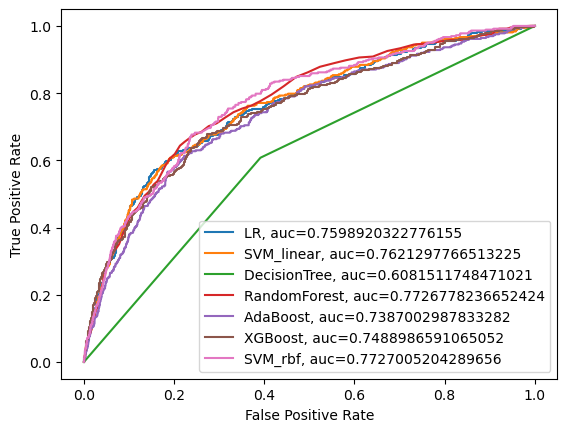

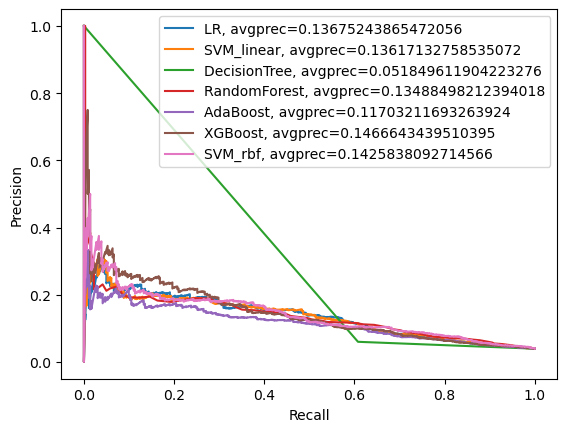

In [19]:
for dataset in allXy:
    ViewResult(dataset, models)

In [20]:
#Function for GridSearchCV for Best Parameters

def GridSearchBP(mod, par, dat):
    rec = {}
    Xy_test = pd.concat([dat[2], dat[3]],axis=1)

    stratifiedCV = StratifiedKFold(n_splits=5)

    for model in mod:
        st = time.time()
        BestParams = GridSearchCV(
            mod[model],
            param_grid = par[model],
            scoring='f1',
            cv=stratifiedCV,
            n_jobs=-1
        )
        BestParams.fit(dat[0], dat[1])
        Xy_test[model] = BestParams.predict(dat[2])
        Xy_test[model+'_ProbTrue'] = BestParams.predict_proba(dat[2])[:,1]
        rec[model] = BestParams
        et = time.time()
        print('For {} cross validation F1 score is {:.4f}'.format(model,BestParams.best_score_))
        print(f'Parameters are {BestParams.best_params_}.')
        print(f'Runtime = {et-st}')
    return (rec, Xy_test)

In [21]:
models = {
    'LR':LR(),
    'SVM_linear':SVC(kernel='linear', probability=True),
    'DecisionTree':DTC(criterion='entropy'),
    'RandomForest':RFC(criterion='entropy'),
    'AdaBoost':ABC(),
    'XGBoost':XGBC(),
    'SVM_rbf':SVC(kernel='rbf', probability=True)
}
params = {
    'LR':{
        'C':np.arange(0.1,1,0.1)
    },
    'SVM_linear':{
        'C':[0.1,1,10,20]
    },
    'DecisionTree':{
        'max_depth':[10,50,100]
    },
    'RandomForest':{
        'n_estimators':[10,50,100],
        'max_depth':[2,10,50,100]
    },
    'AdaBoost':{
        'n_estimators':[10,50,100],
        'learning_rate':np.arange(0.1,1,0.1)
    },
    'XGBoost':{
        'n_estimators':[10,50,100],
        'max_depth':[2,4,8],
        'learning_rate':[0.1,1,10]
    },
    'SVM_rbf':{
        'C':[0.1,1,10,20]
    }
}

In [22]:
rec4, dfresult4 = GridSearchBP(models, params, data)

For LR cross validation F1 score is 0.6686
Parameters are {'C': 0.30000000000000004}.
Runtime = 5.64584755897522
For SVM_linear cross validation F1 score is 0.6691
Parameters are {'C': 1}.
Runtime = 17.91132926940918
For DecisionTree cross validation F1 score is 0.6448
Parameters are {'max_depth': 10}.
Runtime = 0.2717776298522949
For RandomForest cross validation F1 score is 0.6784
Parameters are {'max_depth': 10, 'n_estimators': 100}.
Runtime = 3.708268642425537
For AdaBoost cross validation F1 score is 0.6780
Parameters are {'learning_rate': 0.8, 'n_estimators': 50}.
Runtime = 5.383438348770142
For XGBoost cross validation F1 score is 0.6847
Parameters are {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 50}.
Runtime = 3.8982443809509277
For SVM_rbf cross validation F1 score is 0.6692
Parameters are {'C': 0.1}.
Runtime = 6.720457315444946


 Contingency Table for LR:
Pred   False  True 
Label              
False   6765   2059
True     129    233
F1 Score: 0.1755840241145441

 Contingency Table for SVM_linear:
Pred   False  True 
Label              
False   6983   1841
True     139    223
F1 Score: 0.18384171475680133

 Contingency Table for DecisionTree:
Pred   False  True 
Label              
False   6300   2524
True     136    226
F1 Score: 0.14524421593830333

 Contingency Table for RandomForest:
Pred   False  True 
Label              
False   6674   2150
True     118    244
F1 Score: 0.17706821480406387

 Contingency Table for AdaBoost:
Pred   False  True 
Label              
False   6496   2328
True     126    236
F1 Score: 0.16131237183868763

 Contingency Table for XGBoost:
Pred      0     1
Label            
False  6422  2402
True    119   243
F1 Score: 0.1616228799467908

 Contingency Table for SVM_rbf:
Pred   False  True 
Label              
False   6141   2683
True     108    254
F1 Score: 0.15398605638072144



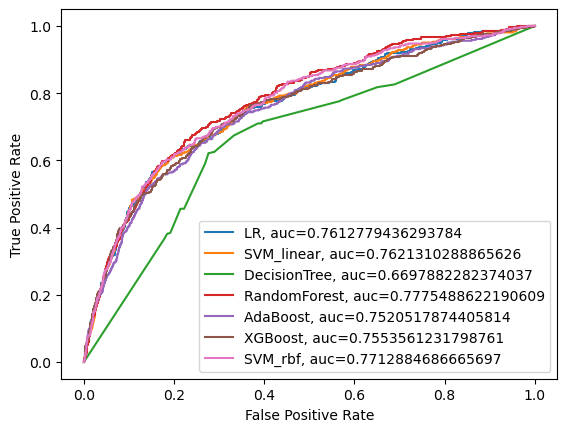

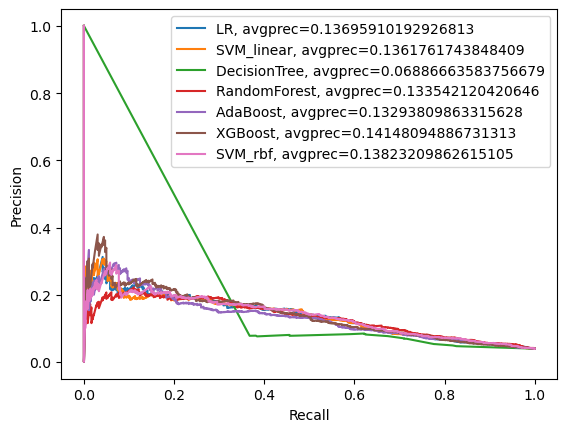

In [23]:
ViewResult(dfresult4, models)

In [24]:
#setting parameters based on an initial GridSearch ran
models_2 = {
    'LR':LR(C=0.3),
    'SVM_linear':SVC(kernel='linear',C=1,probability=True),
    'DecisionTree':DTC(criterion='entropy',max_depth=10),
    'RandomForest':RFC(criterion='entropy',max_depth=10,n_estimators=100),
    'AdaBoost':ABC(learning_rate=0.8,n_estimators=50),
    'XGBoost':XGBC(learning_rate=0.1,max_depth=8,n_estimators=50),
    'SVM_rbf':SVC(kernel='rbf',C=0.1,probability=True)
}

In [25]:
#Testing of feature selection with auto setting and best parameters from above.

fsrec4={}

for model in models_2:
    feature_selection = SFS(
        models_2[model], n_features_to_select='auto', direction="forward", n_jobs=-1
    ).fit(data[0], data[1])
    
    fsrec4[model] = feature_selection
    print(model, feature_selection.n_features_to_select_, data[0].columns[feature_selection.support_])

LR 16 Index(['heart_rate_min', 'heart_rate_max', 'mbp_mean', 'sbp_mean', 'dbp_max',
       'temperature_max', 'wbc_min', 'wbc_max', 'creatinine_min',
       'creatinine_max', 'hemoglobin_max', 'urineoutput',
       'sofa_cardiovascular', 'sofa_cns', 'sofa_renal',
       'charlson_comorbidity_index'],
      dtype='object')
SVM_linear 16 Index(['gender', 'age', 'heart_rate_min', 'heart_rate_max', 'heart_rate_mean',
       'mbp_mean', 'sbp_mean', 'dbp_max', 'temperature_max',
       'temperature_mean', 'glucose_min', 'glucose_max', 'wbc_min', 'wbc_max',
       'urineoutput', 'sofa_cns'],
      dtype='object')
DecisionTree 16 Index(['gender', 'age', 'heart_rate_min', 'heart_rate_mean', 'mbp_max',
       'dbp_min', 'dbp_max', 'dbp_mean', 'temperature_mean', 'pt_max',
       'urineoutput', 'sofa_coagulation', 'sofa_cardiovascular', 'sofa_cns',
       'sofa_renal', 'charlson_comorbidity_index'],
      dtype='object')
RandomForest 16 Index(['gender', 'age', 'heart_rate_min', 'mbp_min', 'mbp_me

In [26]:
#Creating a function for feature selection and fitting of best hyperparameters

def FeatureSelect_BestParams(models, models2, params, data, n_features):
    fsrec = {}
    bprec = {}
    dfresult = pd.concat([data[2],data[3]],axis=1)
    stratifiedCV = StratifiedKFold(n_splits=5)
    
    for model in models2:
        st = time.time()
        feature_selection = SFS(
            models2[model], n_features_to_select=n_features, direction="forward", n_jobs=-1
        ).fit(data[0], data[1])

        fsrec[model] = feature_selection
        print(model, feature_selection.n_features_to_select_, data[0].columns[feature_selection.support_])

        X = data[0].loc[:,list(data[0].columns[feature_selection.support_])]
        X_test = data[2].loc[:,list(data[0].columns[feature_selection.support_])]

        BestParams = GridSearchCV(
            models[model],
            param_grid = params[model],
            scoring='f1',
            n_jobs=-1
        )
        BestParams.fit(X,data[1])
        dfresult[model] = BestParams.predict(X_test)
        dfresult[model+'_ProbTrue'] = BestParams.predict_proba(X_test)[:,1]
        bprec[model] = BestParams
        et = time.time()
        print('For {} cross validation F1 score is {:.4f}'.format(model,BestParams.best_score_))
        print(f'Best parameters are {BestParams.best_params_}.')
        print(f'Runtime = {et-st}')
    return (fsrec, bprec, dfresult)

In [27]:
#Training and evaluating models with 10 features
data=df_list[0]

fs_rec4_10, bp_rec4_10, dfresult4_10 = FeatureSelect_BestParams(models, models_2, params, data, 10)

LR 10 Index(['heart_rate_min', 'mbp_mean', 'sbp_mean', 'wbc_min', 'wbc_max',
       'creatinine_min', 'hemoglobin_max', 'urineoutput',
       'sofa_cardiovascular', 'sofa_cns'],
      dtype='object')
For LR cross validation F1 score is 0.6926
Best parameters are {'C': 0.6}.
Runtime = 3.7511773109436035
SVM_linear 10 Index(['gender', 'age', 'heart_rate_min', 'heart_rate_max', 'sbp_mean',
       'dbp_max', 'wbc_min', 'wbc_max', 'urineoutput', 'sofa_cns'],
      dtype='object')
For SVM_linear cross validation F1 score is 0.6742
Best parameters are {'C': 1}.
Runtime = 124.74651408195496
DecisionTree 10 Index(['gender', 'mbp_mean', 'sbp_max', 'dbp_min', 'dbp_mean',
       'temperature_mean', 'sofa_coagulation', 'sofa_cardiovascular',
       'sofa_cns', 'sofa_renal'],
      dtype='object')
For DecisionTree cross validation F1 score is 0.6577
Best parameters are {'max_depth': 10}.
Runtime = 4.252273797988892
RandomForest 10 Index(['gender', 'heart_rate_mean', 'mbp_max', 'mbp_mean', 'dbp_min',

 Contingency Table for LR:
Pred   False  True 
Label              
False   6788   2036
True     129    233
F1 Score: 0.17711896617255798

 Contingency Table for SVM_linear:
Pred   False  True 
Label              
False   7143   1681
True     142    220
F1 Score: 0.19443216968625718

 Contingency Table for DecisionTree:
Pred   False  True 
Label              
False   6141   2683
True     125    237
F1 Score: 0.1444241316270567

 Contingency Table for RandomForest:
Pred   False  True 
Label              
False   6758   2066
True     138    224
F1 Score: 0.16892911010558068

 Contingency Table for AdaBoost:
Pred   False  True 
Label              
False   6737   2087
True     130    232
F1 Score: 0.1730697500932488

 Contingency Table for XGBoost:
Pred      0     1
Label            
False  6185  2639
True    119   243
F1 Score: 0.1498150431565968

 Contingency Table for SVM_rbf:
Pred   False  True 
Label              
False   6752   2072
True     127    235
F1 Score: 0.17609591607343575



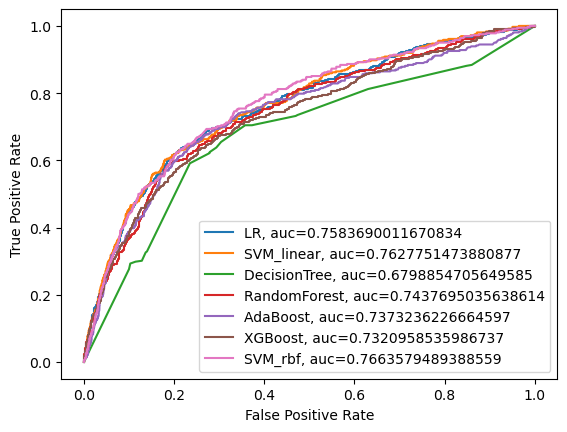

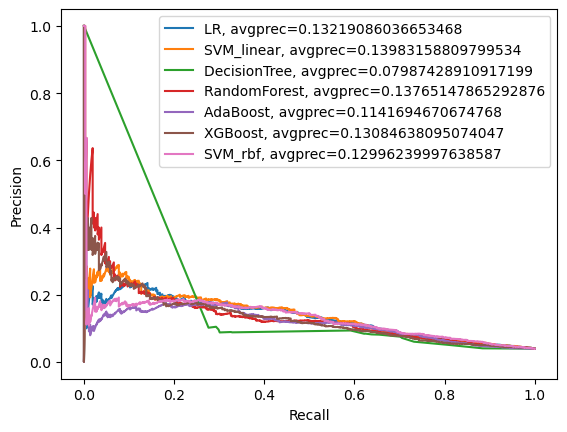

In [28]:
ViewResult(dfresult4_10, models)
# There seems to be an improvement in F1 scores when compared to models that included all features

In [29]:
#Training and testing for 5 features

data=df_list[0]

fs_rec4_5, bp_rec4_5, dfresult4_5 = FeatureSelect_BestParams(models, models_2, params, data, 5)

LR 5 Index(['heart_rate_min', 'wbc_max', 'urineoutput', 'sofa_cardiovascular',
       'sofa_cns'],
      dtype='object')
For LR cross validation F1 score is 0.6949
Best parameters are {'C': 0.6}.
Runtime = 1.9458529949188232
SVM_linear 5 Index(['gender', 'age', 'heart_rate_min', 'heart_rate_max', 'sofa_cns'], dtype='object')
For SVM_linear cross validation F1 score is 0.6587
Best parameters are {'C': 1}.
Runtime = 62.51236414909363
DecisionTree 5 Index(['gender', 'temperature_mean', 'sofa_coagulation', 'sofa_cardiovascular',
       'sofa_cns'],
      dtype='object')
For DecisionTree cross validation F1 score is 0.6369
Best parameters are {'max_depth': 10}.
Runtime = 1.838850736618042
RandomForest 5 Index(['gender', 'wbc_min', 'sofa_coagulation', 'sofa_cardiovascular',
       'sofa_cns'],
      dtype='object')
For RandomForest cross validation F1 score is 0.6643
Best parameters are {'max_depth': 2, 'n_estimators': 10}.
Runtime = 49.02359700202942
AdaBoost 5 Index(['sbp_min', 'dbp_mean',

 Contingency Table for LR:
Pred   False  True 
Label              
False   6836   1988
True     133    229
F1 Score: 0.17758821248545947

 Contingency Table for SVM_linear:
Pred   False  True 
Label              
False   7203   1621
True     147    215
F1 Score: 0.19563239308462238

 Contingency Table for DecisionTree:
Pred   False  True 
Label              
False   6251   2573
True     141    221
F1 Score: 0.1400506970849176

 Contingency Table for RandomForest:
Pred   False  True 
Label              
False   6846   1978
True     142    220
F1 Score: 0.171875

 Contingency Table for AdaBoost:
Pred   False  True 
Label              
False   6840   1984
True     135    227
F1 Score: 0.17644772638942868

 Contingency Table for XGBoost:
Pred      0     1
Label            
False  6661  2163
True    126   236
F1 Score: 0.17095255342267296

 Contingency Table for SVM_rbf:
Pred   False  True 
Label              
False   6885   1939
True     138    224
F1 Score: 0.17742574257425744



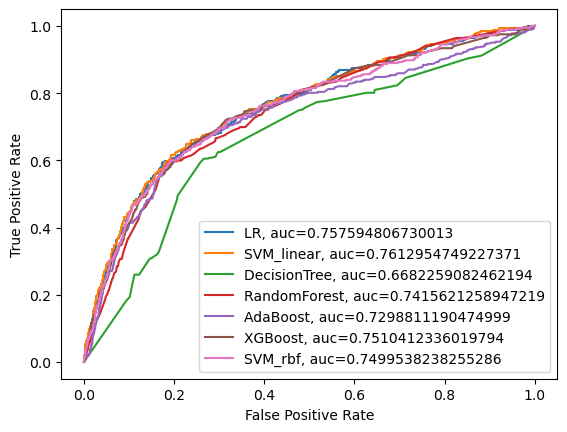

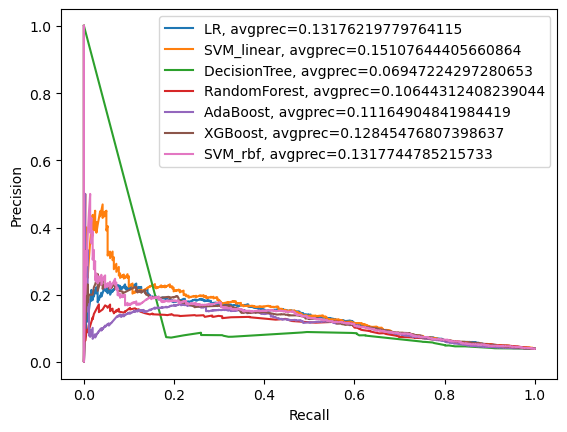

In [30]:
ViewResult(dfresult4_5, models)

In [31]:
#15 features
data=df_list[0]

fs_rec4_15, bp_rec4_15, dfresult4_15 = FeatureSelect_BestParams(models, models_2, params, data, 15)

LR 15 Index(['heart_rate_min', 'heart_rate_max', 'mbp_mean', 'sbp_mean', 'dbp_max',
       'temperature_max', 'wbc_min', 'wbc_max', 'creatinine_min',
       'creatinine_max', 'hemoglobin_max', 'urineoutput',
       'sofa_cardiovascular', 'sofa_cns', 'charlson_comorbidity_index'],
      dtype='object')
For LR cross validation F1 score is 0.6902
Best parameters are {'C': 0.1}.
Runtime = 5.2988715171813965
SVM_linear 15 Index(['gender', 'age', 'heart_rate_min', 'heart_rate_max', 'heart_rate_mean',
       'mbp_mean', 'sbp_mean', 'dbp_max', 'temperature_max',
       'temperature_mean', 'glucose_max', 'wbc_min', 'wbc_max', 'urineoutput',
       'sofa_cns'],
      dtype='object')
For SVM_linear cross validation F1 score is 0.6771
Best parameters are {'C': 1}.
Runtime = 187.76852083206177
DecisionTree 15 Index(['gender', 'heart_rate_max', 'heart_rate_mean', 'mbp_min', 'mbp_max',
       'mbp_mean', 'dbp_max', 'temperature_min', 'temperature_mean',
       'glucose_min', 'glucose_max', 'pt_max', 

 Contingency Table for LR:
Pred   False  True 
Label              
False   6807   2017
True     129    233
F1 Score: 0.17840735068912714

 Contingency Table for SVM_linear:
Pred   False  True 
Label              
False   7122   1702
True     140    222
F1 Score: 0.1942257217847769

 Contingency Table for DecisionTree:
Pred   False  True 
Label              
False   6150   2674
True     134    228
F1 Score: 0.13970588235294118

 Contingency Table for RandomForest:
Pred   False  True 
Label              
False   6663   2161
True     130    232
F1 Score: 0.16842105263157894

 Contingency Table for AdaBoost:
Pred   False  True 
Label              
False   6414   2410
True     125    237
F1 Score: 0.1575274177467597

 Contingency Table for XGBoost:
Pred      0     1
Label            
False  6246  2578
True    121   241
F1 Score: 0.1515246777742848

 Contingency Table for SVM_rbf:
Pred   False  True 
Label              
False   6570   2254
True     124    238
F1 Score: 0.1667834618079888



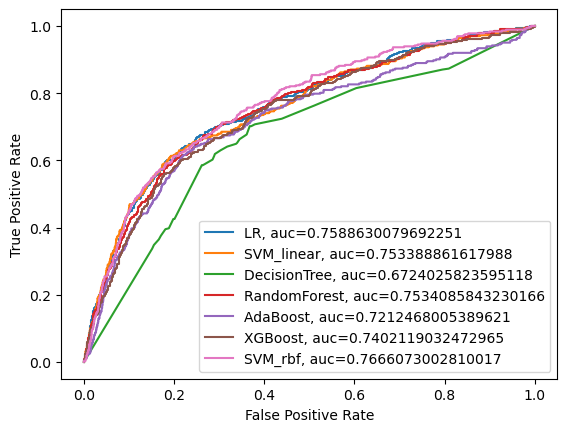

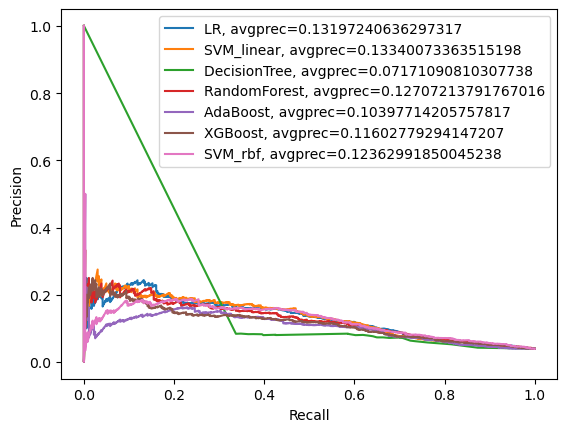

In [32]:
ViewResult(dfresult4_15, models)

In [66]:
#Optimal number of features seem to be between 5 to 10 features
#8 features
fs_rec4_8, bp_rec4_8, dfresult4_8 = FeatureSelect_BestParams(models, models_2, params, data, 8)

LR 8 Index(['heart_rate_min', 'sbp_mean', 'wbc_min', 'wbc_max', 'hemoglobin_max',
       'urineoutput', 'sofa_cardiovascular', 'sofa_cns'],
      dtype='object')
For LR cross validation F1 score is 0.6946
Best parameters are {'C': 0.1}.
Runtime = 8.556686639785767
SVM_linear 8 Index(['gender', 'age', 'heart_rate_min', 'heart_rate_max', 'sbp_mean',
       'dbp_max', 'urineoutput', 'sofa_cns'],
      dtype='object')
For SVM_linear cross validation F1 score is 0.6634
Best parameters are {'C': 1}.
Runtime = 85.17237424850464
DecisionTree 8 Index(['gender', 'mbp_min', 'dbp_min', 'dbp_mean', 'temperature_mean',
       'sofa_coagulation', 'sofa_cns', 'charlson_comorbidity_index'],
      dtype='object')
For DecisionTree cross validation F1 score is 0.6455
Best parameters are {'max_depth': 10}.
Runtime = 3.035078525543213
RandomForest 8 Index(['gender', 'mbp_mean', 'dbp_min', 'wbc_min', 'urineoutput',
       'sofa_coagulation', 'sofa_cardiovascular', 'sofa_cns'],
      dtype='object')
For Rando

 Contingency Table for LR:
Pred   False  True 
Label              
False   6831   1993
True     130    232
F1 Score: 0.17935833011209895

 Contingency Table for SVM_linear:
Pred   False  True 
Label              
False   7232   1592
True     147    215
F1 Score: 0.198248040571692

 Contingency Table for DecisionTree:
Pred   False  True 
Label              
False   6236   2588
True     137    225
F1 Score: 0.14173228346456693

 Contingency Table for RandomForest:
Pred   False  True 
Label              
False   6282   2542
True     133    229
F1 Score: 0.14618576444302586

 Contingency Table for AdaBoost:
Pred   False  True 
Label              
False   6734   2090
True     135    227
F1 Score: 0.16946621873833517

 Contingency Table for XGBoost:
Pred      0     1
Label            
False  6588  2236
True    123   239
F1 Score: 0.16848783926683117

 Contingency Table for SVM_rbf:
Pred   False  True 
Label              
False   6844   1980
True     139    223
F1 Score: 0.17387914230019494



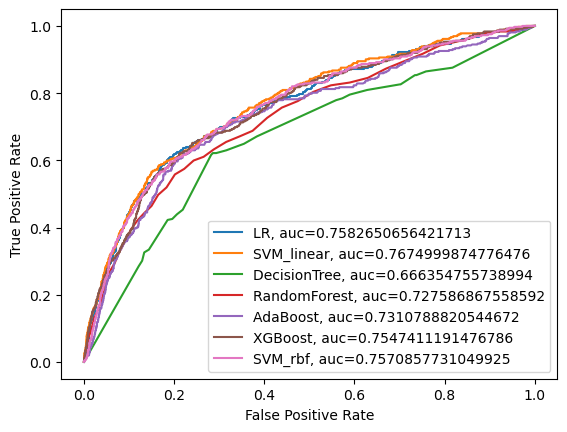

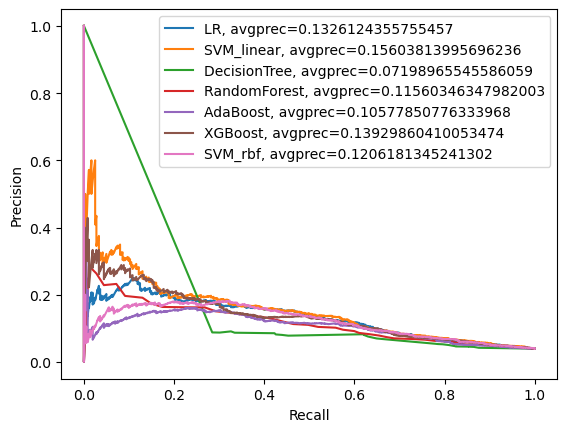

In [36]:
ViewResult(dfresult4_8, models)

In [37]:
#7 features
data=df_list[0]

fs_rec4_7, bp_rec4_7, dfresult4_7 = FeatureSelect_BestParams(models, models_2, params, data, 7)

LR 7 Index(['heart_rate_min', 'wbc_min', 'wbc_max', 'hemoglobin_max', 'urineoutput',
       'sofa_cardiovascular', 'sofa_cns'],
      dtype='object')
For LR cross validation F1 score is 0.6962
Best parameters are {'C': 0.2}.
Runtime = 8.470253705978394
SVM_linear 7 Index(['gender', 'age', 'heart_rate_min', 'heart_rate_max', 'sbp_mean',
       'dbp_max', 'sofa_cns'],
      dtype='object')
For SVM_linear cross validation F1 score is 0.6586
Best parameters are {'C': 10}.
Runtime = 74.9747097492218
DecisionTree 7 Index(['gender', 'heart_rate_max', 'heart_rate_mean', 'temperature_mean',
       'pt_max', 'sofa_coagulation', 'sofa_cns'],
      dtype='object')
For DecisionTree cross validation F1 score is 0.6621
Best parameters are {'max_depth': 10}.
Runtime = 2.510225772857666
RandomForest 7 Index(['gender', 'mbp_mean', 'wbc_max', 'sofa_coagulation',
       'sofa_cardiovascular', 'sofa_cns', 'charlson_comorbidity_index'],
      dtype='object')
For RandomForest cross validation F1 score is 0.6

 Contingency Table for LR:
Pred   False  True 
Label              
False   6831   1993
True     131    231
F1 Score: 0.1786542923433875

 Contingency Table for SVM_linear:
Pred   False  True 
Label              
False   7203   1621
True     147    215
F1 Score: 0.19563239308462238

 Contingency Table for DecisionTree:
Pred   False  True 
Label              
False   6293   2531
True     123    239
F1 Score: 0.1526181353767561

 Contingency Table for RandomForest:
Pred   False  True 
Label              
False   6721   2103
True     132    230
F1 Score: 0.17068645640074212

 Contingency Table for AdaBoost:
Pred   False  True 
Label              
False   6784   2040
True     136    226
F1 Score: 0.17199391171993908

 Contingency Table for XGBoost:
Pred      0     1
Label            
False  6390  2434
True    124   238
F1 Score: 0.15688859591298615

 Contingency Table for SVM_rbf:
Pred   False  True 
Label              
False   6758   2066
True     135    227
F1 Score: 0.17099811676082863



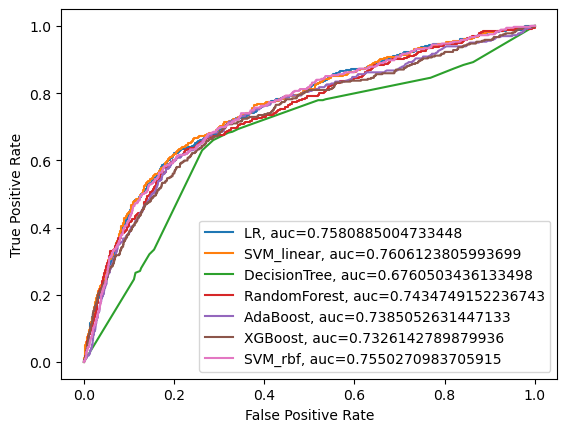

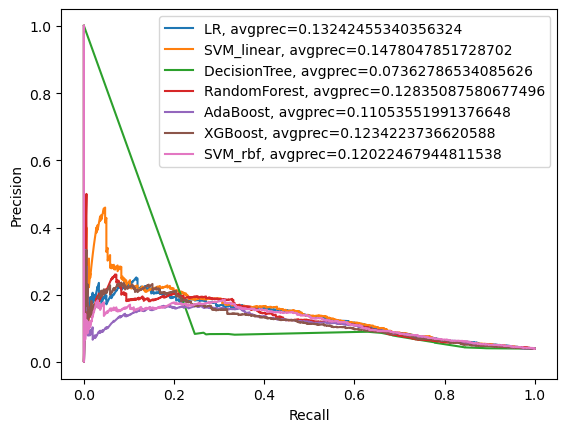

In [38]:
ViewResult(dfresult4_7, models)

In [39]:
#12 features selected to double confirm that the best number of feature is not between 10 - 15 features.
data=df_list[0]

fs_rec4_12, bp_rec4_12, dfresult4_12 = FeatureSelect_BestParams(models, models_2, params, data, 12)

LR 12 Index(['heart_rate_min', 'mbp_mean', 'sbp_mean', 'wbc_min', 'wbc_max',
       'creatinine_min', 'creatinine_max', 'hemoglobin_max', 'urineoutput',
       'sofa_cardiovascular', 'sofa_cns', 'charlson_comorbidity_index'],
      dtype='object')
For LR cross validation F1 score is 0.6944
Best parameters are {'C': 0.1}.
Runtime = 3.9674761295318604
SVM_linear 12 Index(['gender', 'age', 'heart_rate_min', 'heart_rate_max', 'heart_rate_mean',
       'sbp_mean', 'dbp_max', 'temperature_max', 'wbc_min', 'wbc_max',
       'urineoutput', 'sofa_cns'],
      dtype='object')
For SVM_linear cross validation F1 score is 0.6771
Best parameters are {'C': 1}.
Runtime = 125.3343551158905
DecisionTree 12 Index(['gender', 'mbp_max', 'mbp_mean', 'sbp_max', 'dbp_min',
       'temperature_max', 'temperature_mean', 'wbc_min', 'pt_min', 'pt_max',
       'sofa_coagulation', 'sofa_cns'],
      dtype='object')
For DecisionTree cross validation F1 score is 0.6445
Best parameters are {'max_depth': 10}.
Runtime =

 Contingency Table for LR:
Pred   False  True 
Label              
False   6802   2022
True     128    234
F1 Score: 0.1787624140565317

 Contingency Table for SVM_linear:
Pred   False  True 
Label              
False   7114   1710
True     140    222
F1 Score: 0.1935483870967742

 Contingency Table for DecisionTree:
Pred   False  True 
Label              
False   5945   2879
True     122    240
F1 Score: 0.13789141051422005

 Contingency Table for RandomForest:
Pred   False  True 
Label              
False   6831   1993
True     136    226
F1 Score: 0.17512592018597445

 Contingency Table for AdaBoost:
Pred   False  True 
Label              
False   6852   1972
True     135    227
F1 Score: 0.17727450214759857

 Contingency Table for XGBoost:
Pred      0     1
Label            
False  6377  2447
True    123   239
F1 Score: 0.15682414698162728

 Contingency Table for SVM_rbf:
Pred   False  True 
Label              
False   6536   2288
True     122    240
F1 Score: 0.1660899653979239



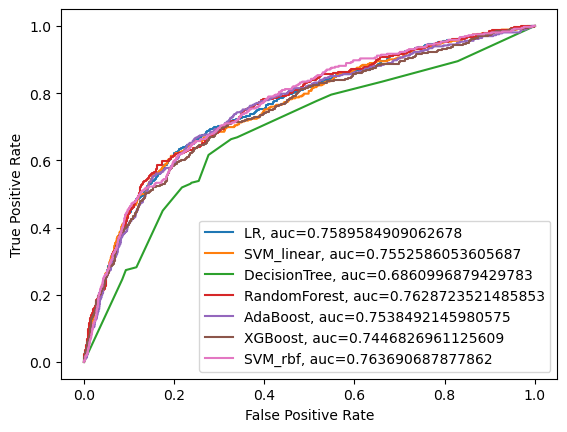

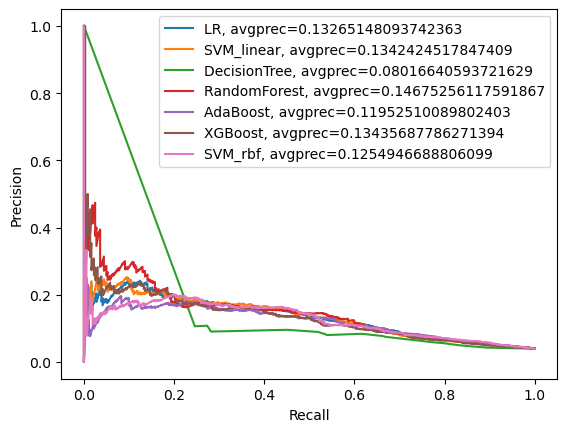

In [40]:
ViewResult(dfresult4_12, models)

In [41]:
#9 features
data=df_list[0]

fs_rec4_9, bp_rec4_9, dfresult4_9 = FeatureSelect_BestParams(models, models_2, params, data, 9)

LR 9 Index(['heart_rate_min', 'sbp_mean', 'wbc_min', 'wbc_max', 'creatinine_min',
       'hemoglobin_max', 'urineoutput', 'sofa_cardiovascular', 'sofa_cns'],
      dtype='object')
For LR cross validation F1 score is 0.6909
Best parameters are {'C': 0.2}.
Runtime = 8.990095615386963
SVM_linear 9 Index(['gender', 'age', 'heart_rate_min', 'heart_rate_max', 'sbp_mean',
       'dbp_max', 'wbc_min', 'urineoutput', 'sofa_cns'],
      dtype='object')
For SVM_linear cross validation F1 score is 0.6734
Best parameters are {'C': 10}.
Runtime = 95.54286503791809
DecisionTree 9 Index(['gender', 'sbp_max', 'wbc_min', 'pt_min', 'urineoutput',
       'sofa_coagulation', 'sofa_cardiovascular', 'sofa_cns', 'sofa_renal'],
      dtype='object')
For DecisionTree cross validation F1 score is 0.6420
Best parameters are {'max_depth': 10}.
Runtime = 3.1130661964416504
RandomForest 9 Index(['gender', 'age', 'mbp_mean', 'dbp_min', 'wbc_max', 'urineoutput',
       'sofa_coagulation', 'sofa_cardiovascular', 'sofa_

 Contingency Table for LR:
Pred   False  True 
Label              
False   6816   2008
True     130    232
F1 Score: 0.17832436587240585

 Contingency Table for SVM_linear:
Pred   False  True 
Label              
False   7108   1716
True     142    220
F1 Score: 0.19147084421235858

 Contingency Table for DecisionTree:
Pred   False  True 
Label              
False   5615   3209
True     117    245
F1 Score: 0.12840670859538783

 Contingency Table for RandomForest:
Pred   False  True 
Label              
False   6786   2038
True     125    237
F1 Score: 0.1797497155858931

 Contingency Table for AdaBoost:
Pred   False  True 
Label              
False   7008   1816
True     141    221
F1 Score: 0.1842434347644852

 Contingency Table for XGBoost:
Pred      0     1
Label            
False  6566  2258
True    127   235
F1 Score: 0.1646234676007005

 Contingency Table for SVM_rbf:
Pred   False  True 
Label              
False   6886   1938
True     139    223
F1 Score: 0.17677368212445502



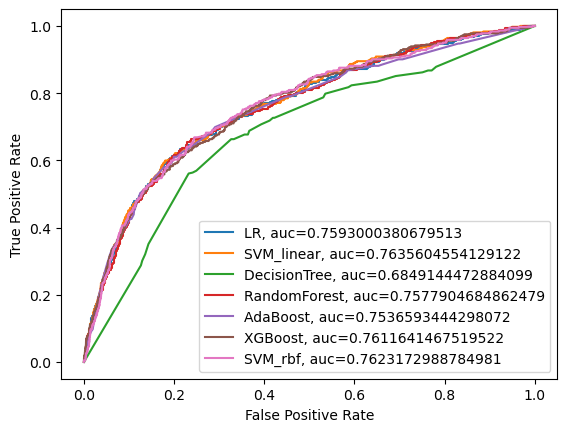

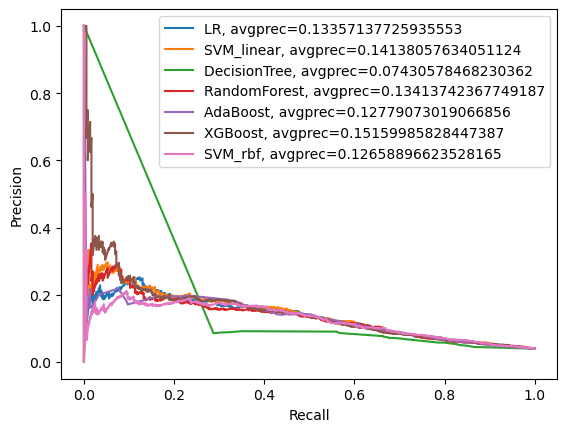

In [42]:
ViewResult(dfresult4_9, models)

In [50]:
X_SVMlinear_8 = data[2].loc[:,list(data[0].columns[fs_rec4_8['SVM_linear'].support_])]
X_SVMlinear_8_test

,gender,age,heart_rate_min,heart_rate_max,sbp_mean,dbp_max,urineoutput,sofa_cns
24830,0.914024,0.679504,1.464740,1.396824,-0.789225,0.030348,-0.047353,2.935555
9798,0.914024,0.596700,-1.124195,-1.165675,-0.200793,-0.911002,-0.935356,0.080482
10384,0.914024,0.614491,-0.725898,-1.214024,-1.014242,0.129438,1.669452,-0.871209
30781,-1.094033,1.534747,-2.319089,-0.827231,-1.466696,-1.901896,-0.716710,1.983864
18829,0.914024,0.622614,0.867293,-0.005298,-0.849713,-0.167831,-0.923516,0.080482
...,...,...,...,...,...,...,...,...
20715,0.914024,0.269800,0.601761,0.719938,1.213411,0.525796,-0.169700,0.080482
14856,-1.094033,-2.317428,0.137081,0.139749,0.381059,0.327617,2.640335,-0.871209
29727,0.914024,-0.508827,0.336229,0.139749,2.306786,0.079893,-0.722235,0.080482
8110,-1.094033,1.504735,-0.327600,-0.392090,0.402399,1.913048,-0.209167,0.080482


In [64]:
#from the above feature selection runs, it seems that the optimal number of features selected is 8 features.
#Running SVM Linear with 8 features with finer hyperparameter tuning

st = time.time()
dfresult_SVM_8 = pd.concat([data[2],data[3]],axis=1)

stratifiedCV = StratifiedKFold(n_splits=5)

X_SVMlinear_8 = data[0].loc[:,list(data[0].columns[fs_rec4_8['SVM_linear'].support_])]
X_SVMlinear_8_test = data[2].loc[:,list(data[0].columns[fs_rec4_8['SVM_linear'].support_])]

BestParams_SVMlinear8 = GridSearchCV(
        SVC(kernel='linear', probability=True),
        param_grid = {'C': np.arange(0.1,2,0.1)},
        scoring='f1',
        n_jobs=-1
    )
BestParams_SVMlinear8.fit(X_SVMlinear_8,data[1])
dfresult_SVM_8['SVM_linear'] = BestParams_SVMlinear8.predict(X_SVMlinear_8_test)
dfresult_SVM_8['SVM_linear_ProbTrue'] = BestParams_SVMlinear8.predict_proba(X_SVMlinear_8_test)[:,1]

et = time.time()
print('For {} cross validation F1 score is {:.4f}'.format(model,BestParams_SVMlinear8.best_score_))
print(f'Best parameters are {BestParams_SVMlinear8.best_params_}.')
print(f'Runtime = {et-st}')


For SVM_rbf cross validation F1 score is 0.6634
Best parameters are {'C': 0.30000000000000004}.
Runtime = 4.7648766040802


 Contingency Table for SVM_linear:
Pred   False  True 
Label              
False   7233   1591
True     147    215
F1 Score: 0.19833948339483393



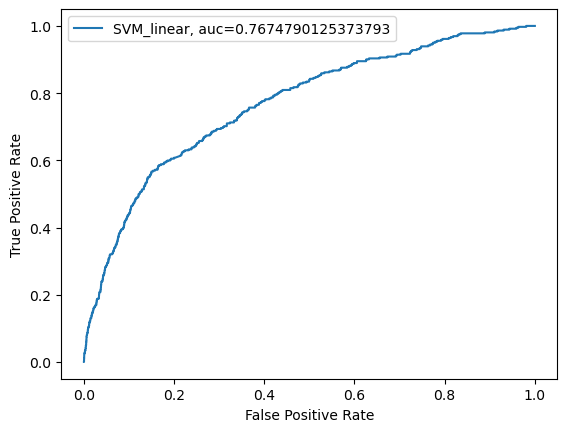

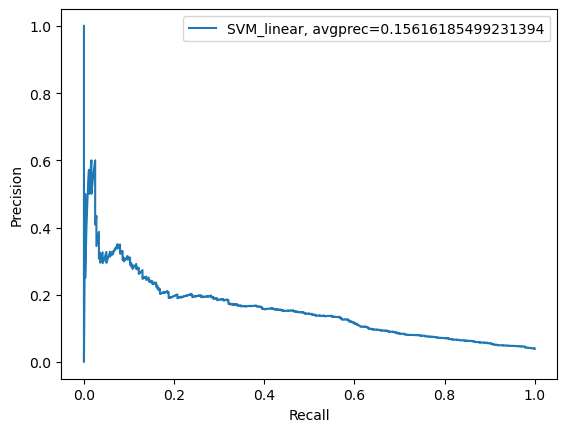

In [65]:
ViewResult(dfresult_SVM_8, ['SVM_linear'])